In [3]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow import keras
from keras.datasets.mnist import load_data
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense

Using TensorFlow backend.


In [4]:
data = load_data()

In [5]:
 # we need to see the data arrangement
np.shape(data)

(2, 2)

data is structured as 2 rows and 2 columns

1 st row is the training data

2nd row is the testing data

1st column is the image and second is the label

In [6]:
# each row is unpacked as a tuple
(train_images, train_labels),(test_images, test_labels)= data


In [7]:
train_images[0]
# prints the entire image, this is the image representation
# makes a numpy array and represents the image in the form of an array

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [8]:
train_labels[0]

5

In [9]:
# print all distinct labels in the dataset using inbuilt set function
set(train_labels)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [10]:
# an image can be sotred as a function of the property of a pixel
# eg intensity/color of the particular co-ordinates
# 2d function f(x,y), 2d arrangement of pixels
# each pixel is defined in RGB, each pixel has a different proportion of (0-255)
# each color is represented by a 8 bit number, hence the range 0-255
# this color is an RGB model
# grey scale images from a range of 0-255 0-black 255- white


In [11]:
# understanding the data structure
# each pixel has a grey scale value in our case
# jpeg contains info like timestamp, size

print('Max pixel value :', train_images[0].max())
print('Min pixel value :', train_images[0].min())
print()
print('Shape of training data', train_images.shape)
print('Shape of each training example : ',train_images[0].shape)
print()
print('Shape of testing data : ',test_images.shape)
print('Shape of each testing example ',test_images[0].shape)
# 60,000 images each image is a 28*28 data

Max pixel value : 255
Min pixel value : 0

Shape of training data (60000, 28, 28)
Shape of each training example :  (28, 28)

Shape of testing data :  (10000, 28, 28)
Shape of each testing example  (28, 28)


In [12]:
print('label :', train_labels[0])
print(train_images[0,5:23,5:23])
# cropped 5 rows and 5 columns from each side

label : 5
[[  0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247]
 [  0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195]
 [  0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39]
 [  0   0  18 219 253 253 253 253 253 198 182 247 241   0   0   0   0   0]
 [  0   0   0  80 156 107 253 253 205  11   0  43 154   0   0   0   0   0]
 [  0   0   0   0  14   1 154 253  90   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 139 253 190   2   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  11 190 253  70   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  35 241 225 160 108   1   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  81 240 253 253 119  25   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  45 186 253 253 150  27   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  16  93 252 253 187   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 249 253 249  64   0   0]
 [  0   0   0  

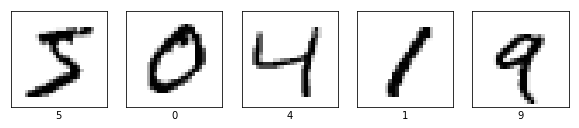

In [13]:
# this kind of repr is not useful for humans, hence we shall visualize it as an image
plt.figure(figsize=(10,10))# size of the plot in which the next plot willbe displayed
for i in range(5):
    # 1 st parameter is the no. of rows, 2nd no.of columns 
    # 3 rd parameter is the index of the subplot
    plt.subplot(1,5,i+1)
    plt.xticks([])
    plt.yticks([])
    # imshow is numpy, takes 2d numpy array
    plt.imshow(train_images[i],cmap=plt.cm.binary)
    # xticks and yticks are empty lists
    # hence no label along x or y
    plt.xlabel(train_labels[i])
    # we pass this parameter so that it is a binary or grey scale image


In [14]:
# preprocessing the data
# done mostly mnist
# scaled, sized, centred
# scaling to smaller range, complexity rduced and faster computattion

# before scaling
np.unique(train_images[0])

array([  0,   1,   2,   3,   9,  11,  14,  16,  18,  23,  24,  25,  26,
        27,  30,  35,  36,  39,  43,  45,  46,  49,  55,  56,  64,  66,
        70,  78,  80,  81,  82,  90,  93,  94, 107, 108, 114, 119, 126,
       127, 130, 132, 133, 135, 136, 139, 148, 150, 154, 156, 160, 166,
       170, 171, 172, 175, 182, 183, 186, 187, 190, 195, 198, 201, 205,
       207, 212, 213, 219, 221, 225, 226, 229, 238, 240, 241, 242, 244,
       247, 249, 250, 251, 252, 253, 255], dtype=uint8)

In [15]:
train_images=train_images/255.0
test_images=test_images/255.0

In [16]:
np.unique(train_images[0])

array([0.        , 0.00392157, 0.00784314, 0.01176471, 0.03529412,
       0.04313725, 0.05490196, 0.0627451 , 0.07058824, 0.09019608,
       0.09411765, 0.09803922, 0.10196078, 0.10588235, 0.11764706,
       0.1372549 , 0.14117647, 0.15294118, 0.16862745, 0.17647059,
       0.18039216, 0.19215686, 0.21568627, 0.21960784, 0.25098039,
       0.25882353, 0.2745098 , 0.30588235, 0.31372549, 0.31764706,
       0.32156863, 0.35294118, 0.36470588, 0.36862745, 0.41960784,
       0.42352941, 0.44705882, 0.46666667, 0.49411765, 0.49803922,
       0.50980392, 0.51764706, 0.52156863, 0.52941176, 0.53333333,
       0.54509804, 0.58039216, 0.58823529, 0.60392157, 0.61176471,
       0.62745098, 0.65098039, 0.66666667, 0.67058824, 0.6745098 ,
       0.68627451, 0.71372549, 0.71764706, 0.72941176, 0.73333333,
       0.74509804, 0.76470588, 0.77647059, 0.78823529, 0.80392157,
       0.81176471, 0.83137255, 0.83529412, 0.85882353, 0.86666667,
       0.88235294, 0.88627451, 0.89803922, 0.93333333, 0.94117

What is a neural network ?

Similar to human brain - input layer,hidden layer and output layer where every node denotes one feature

When the complexity increases we need more layers, when there are more features our learning becomes deeper as it can deal with more features

We have 10 nodes in the o/p layer because it is a classification problem

Feedforward neural network- eg convolution neural network, signals travels in one direction used in pattern recognition
feedback- signals travel in both directions/signals travel in both direction

types of data- 60 training data,20 validation data,20 testing data

Seqn model allows you to create the model by adding layer after another
flatten as it suggests unpacks the layer, depending on varying input dimensions







In [17]:
# setting up the artificial nn for the topic
# to setup and build the model
# 1 hidden layer,1i/p layer and 1 o/p layer
# the number of neurons and no. of layers can be varied


In [18]:
# the neural network is a sequential object
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128,activation ='sigmoid'),
    keras.layers.Dense(10,activation ='softmax')
])

In [19]:
# examine the structure of weights of neural network

In [20]:
# model.layers returns the structure of the weeights if the function
# input_layer = model.layers[0]
hidden_layer = model.layers[1]
weights = hidden_layer.get_weights()# returns a list of  2 numpy arrays
# 1 st array is the array of weights and the second is the array of biases
print('Shape of weights:',np.shape(weights[0]))
print('Shape of biases:',np.shape(weights[1]))
# print(weights[0])
# print(weights[1])
# each of the neuron in the i/p layer is connected to each node in the o/p layer

Shape of weights: (784, 128)
Shape of biases: (128,)


In [21]:
output_layer=model.layers[2]
weights1 = output_layer.get_weights()
print('Shape of weights:',np.shape(weights1[0]))
print('Shape of biases:',np.shape(weights1[1]))
# total weights = 128x10

Shape of weights: (128, 10)
Shape of biases: (10,)


In [22]:
# now we shall compile the model
# optimization is computed iteratively till the satisfactory soln is found
# SGD - stochastic
# SGD algorithm has some parameter has to be set
# momentum reduces extra noise and speeds up in various ways

sgd = keras.optimizers.SGD(lr=0.5,decay=1e-6,momentum =0.5)
model.compile(optimizer=sgd,
              loss = 'sparse_categorical_crossentropy',
            metrics=['accuracy'])
# metrics takes a list of evaluation parameters we pass only one element 
# accuracy


In [23]:
# training the model

In [24]:
# we use the fit function for model- which takes 2 parameters
# training data and labels
#Epoch: an arbitrary cutoff, generally defined as "one pass over the entire dataset",
# used to separate training into distinct phases, 
# which is useful for logging and periodic evaluation.
history = model.fit(train_images, train_labels,epochs=10,batch_size=100,validation_split=0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 2s 32us/sample - loss: 0.4055 - accuracy: 0.8803 - val_loss: 0.2110 - val_accuracy: 0.9402
Epoch 2/10
54000/54000 [==============================] - 1s 24us/sample - loss: 0.2195 - accuracy: 0.9354 - val_loss: 0.1602 - val_accuracy: 0.9550
Epoch 3/10
54000/54000 [==============================] - 1s 22us/sample - loss: 0.1641 - accuracy: 0.9522 - val_loss: 0.1241 - val_accuracy: 0.9683
Epoch 4/10
54000/54000 [==============================] - 1s 21us/sample - loss: 0.1319 - accuracy: 0.9613 - val_loss: 0.1095 - val_accuracy: 0.9698
Epoch 5/10
54000/54000 [==============================] - 1s 21us/sample - loss: 0.1098 - accuracy: 0.9677 - val_loss: 0.0972 - val_accuracy: 0.9733
Epoch 6/10
54000/54000 [==============================] - 1s 22us/sample - loss: 0.0935 - accuracy: 0.9727 - val_loss: 0.0889 - val_accuracy: 0.9747
Epoch 7/10
54000/54000 [==============================] -

Text(0, 0.5, 'Loss')

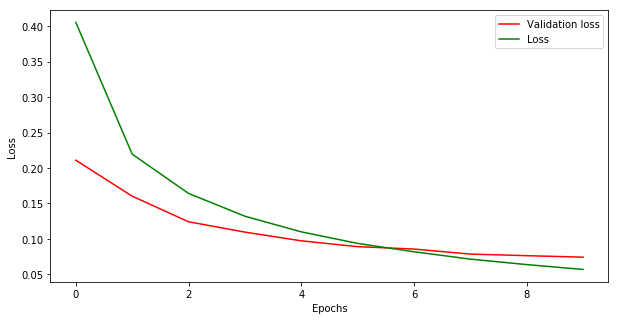

In [25]:
# visualization of training - change of val_loss
# we obtain a fit function from 'val_loss'
# history object contains a dictionary with the name history
# we will use the keys val_loss and loss
# we generate a list of indices to pass as x coordinates to the plot function
val_losses = history.history['val_loss']
losses = history.history['loss']
indices = range(len(losses)) # default step 1
# history is an object of the fit class
plt.figure(figsize=(10,5))
# plot function takes 2 same length arrays
# red
plt.plot(indices,val_losses,color='r')
# green for training data
plt.plot(indices,losses,color='g')
plt.legend(['Validation loss','Loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')

# that loss over the training set is less than validation loss
# in other words accuracy over training is more 
# this is overfitting- the model is trying to memorize
# when the validation loss is slightly higher than training loss than it is ideal
# to stop training the model

In [26]:
# compute the accuracy over testing data
# we use evaluate function of the model class
# the parameters to this function are test_images and test_labels
test_loss, test_acc = model.evaluate(test_images,test_labels)
print('Test accuracy: ',test_acc)
# print(test_labels)



10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Test accuracy:  0.9747


In [27]:
# making predictions over testing data
# takes only one param
predictions = model.predict(test_images)

In [28]:
# defining a function
#to display the image along with confidence levels

In [29]:
def plot_confidence(images,labels,predictions):
    plt.figure(figsize=(15,30))
    # tuple containing width and height
    # you will plot all as subplots
    plt.subplots_adjust(top=0.99,bottom=0.01,hspace=1.5,wspace=0.4)
    plot_index=0
    for i in range(len(images)):
        plot_index +=1
        plt.subplot(len(images),2,plot_index)
        # the 2nd column consists of the confidence levels
        plt.imshow(images[i],cmap=plt.cm.binary)
        correct_label = str(labels[i])
        # because we will choose the max out of 10 classes
        predicted_label = str(np.argmax(predictions[i]))
        title = 'Correct label:'+str(labels[i])+'\n'+'Predicted label:'+str(np.argmax(predictions[i]))
        
        if predicted_label != correct_label:
            plt.title(title,backgroundcolor='r',color='w')
        else :
            plt.title(title,backgroundcolor='g',color='w')
        plt.xticks([])
        plt.yticks([])
        # moving on to the second column
        # confidence graph
        # xcords are from 0-9 and y cords are the resp probabilities
        plot_index +=1
        plt.subplot(len(images),2,plot_index)
        plt.bar(range(10),predictions[i])
        plt.xticks(range(10))
        plt.ylim(0,1)
        # all confidence limits lie in the range 0-1

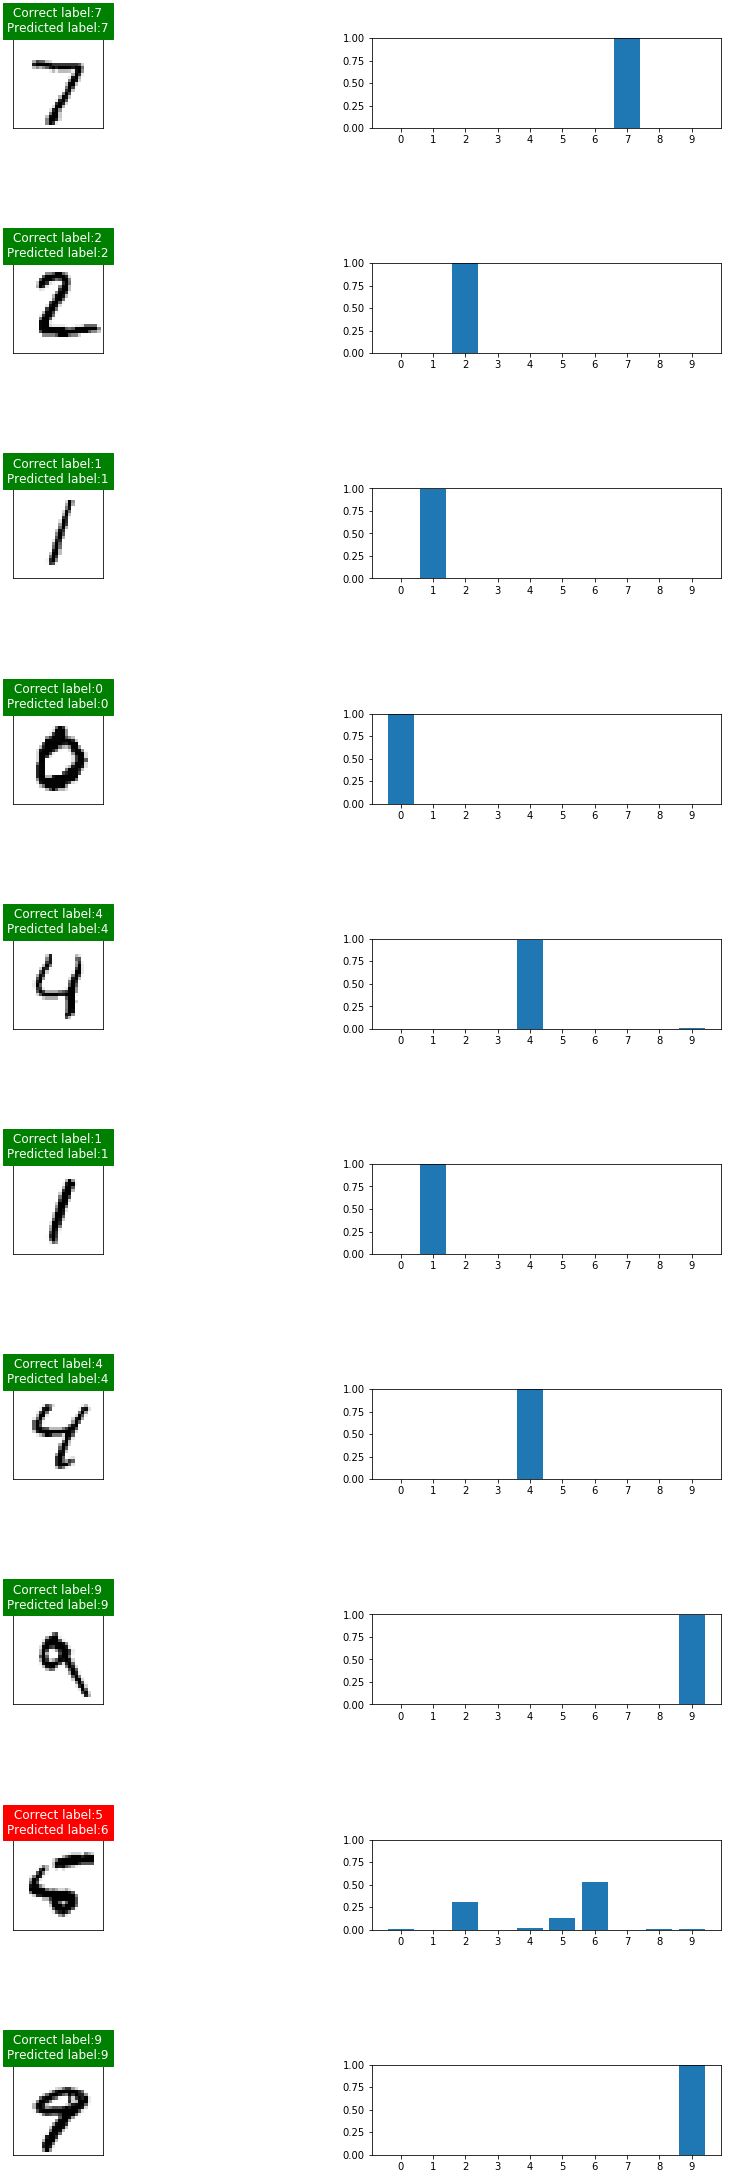

In [30]:
# visualization of random samples from the dataset
# 1 st 10 samples
images=test_images[:10]
labels = test_labels[:10]
test_predictions=predictions[:10]
plot_confidence(images,labels,test_predictions)



Number of incorrectly classifid images :  253


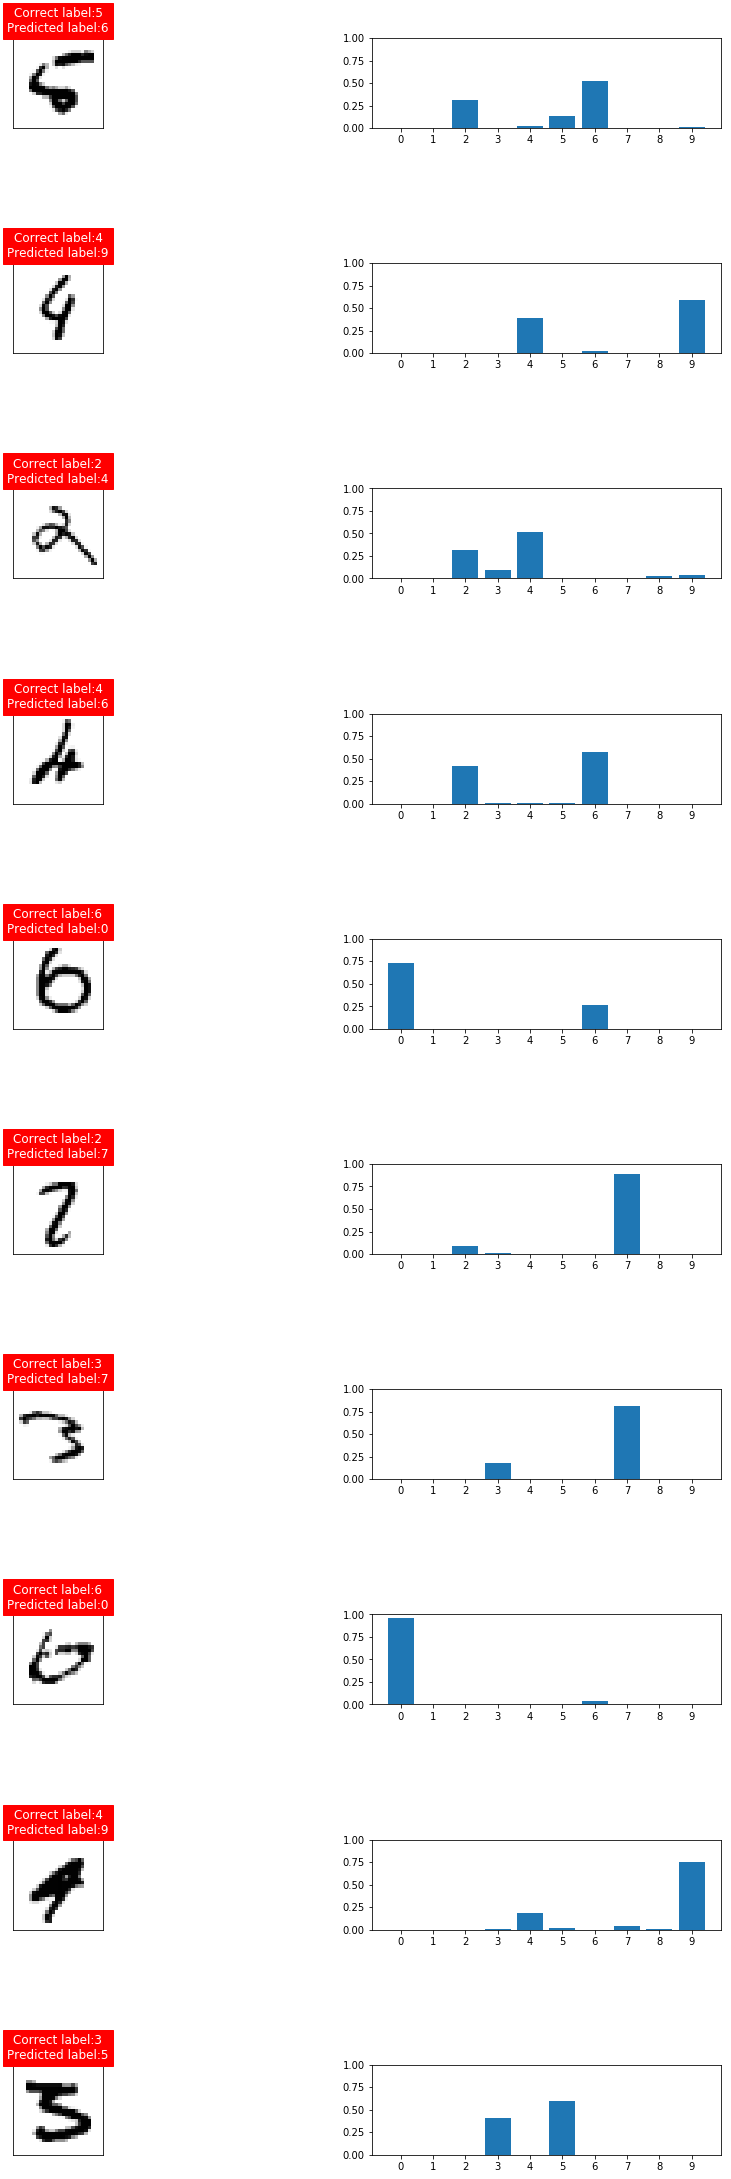

In [31]:
# visualization of images that were classified incorrectly

incorrect_indices = list()

for i in range(len(predictions)):
    predicted_label = np.argmax(predictions[i])
    if predicted_label != test_labels[i]:
        incorrect_indices.append(i)

print('Number of incorrectly classifid images : ',len(incorrect_indices))

incorrect_indices = incorrect_indices[:10]

# finding all incorrect images using a list comprehension
incorrect_images= [test_images[i] for i in incorrect_indices]
incorrect_labels= [test_labels[i] for i in incorrect_indices]
incorrect_predictions= [predictions[i] for i in incorrect_indices]

plot_confidence(incorrect_images,incorrect_labels,incorrect_predictions)


